In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

In [54]:
# Einlesen der Daten
df_abstimmungen = pd.read_csv('data/dataset.csv', sep=";")
file_path = "data/maps/swissboundaries.shp/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"
schweizer_karte = gpd.read_file(file_path)

kanton_map = {
    'zh': 'Zürich', 'be': 'Bern', 'lu': 'Luzern', 'ur': 'Uri', 'sz': 'Schwyz',
    'ow': 'Obwalden', 'nw': 'Nidwalden', 'gl': 'Glarus', 'zg': 'Zug',
    'fr': 'Fribourg', 'so': 'Solothurn', 'bs': 'Basel-Stadt',
    'bl': 'Basel-Landschaft', 'sh': 'Schaffhausen', 'ar': 'Appenzell Ausserrhoden',
    'ai': 'Appenzell Innerrhoden', 'sg': 'St. Gallen', 'gr': 'Graubünden',
    'ag': 'Aargau', 'tg': 'Thurgau', 'ti': 'Ticino', 'vd': 'Vaud',
    'vs': 'Valais', 'ne': 'Neuchâtel', 'ge': 'Genève', 'ju': 'Jura'
}

df_abstimmungen

,anr,datum,titel_kurz_d,titel_kurz_f,titel_kurz_e,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,...,bkresults-fr,bfsdash-de,bfsdash-fr,bfsdash-en,bfsmap-de,bfsmap-fr,bfsmap-en,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,1.0,12.09.1848,Bundesverfassung der schweizerischen Eidgenoss...,Constitution fédérale de la Confédération suisse,Federal Constitution of the Swiss Confederation,Totalrevision vom 12. September 1848,Révision totale du 12 septembre 1848,.,https://swissvotes.ch/vote/1.00,1,...,https://www.bk.admin.ch/ch/f/pore/va/18480606/...,.,.,.,NaN,NaN,.,.,.,.
1,2.0,14.01.1866,Mass und Gewicht,Poids et mesures,Weights and measures,Festsetzung von Mass und Gewicht,Poids et mesures,.,https://swissvotes.ch/vote/2.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
2,3.0,14.01.1866,Gleichstellung der Juden und Naturalisierten m...,Egalité des Juifs,Equal rights for Jews and naturalised citizens...,Gleichstellung der Juden und Naturalisierten m...,Egalité des citoyens au point de vue de l'étab...,.,https://swissvotes.ch/vote/3.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
3,4.0,14.01.1866,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",Swiss residents' right to vote in communal mat...,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",.,https://swissvotes.ch/vote/4.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
4,5.0,14.01.1866,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,Taxation and civil law status of Swiss residents,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,.,https://swissvotes.ch/vote/5.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,673.0,24.11.2024,Ausbau des Autobahnnetzes,Extension du réseau autoroutier,Expansion of the motorway network,Bundesbeschluss über den Ausbauschritt 2023 fü...,Arrêté fédéral sur l’étape d’aménagement 2023 ...,.,https://swissvotes.ch/vote/673.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,https://abstimmungen.admin.ch/fr/details/2024-...,https://abstimmungen.admin.ch/en/details/2024-...,https://abstimmungen.admin.ch/de/embed/2024-11...,https://abstimmungen.admin.ch/fr/embed/2024-11...,https://abstimmungen.admin.ch/en/embed/2024-11...,NaN,NaN,NaN
692,674.0,24.11.2024,Bedingungen für Untermiete,Conditions pour la sous-location,Conditions for subletting,Änderung des Obligationenrechts (Mietrecht: Un...,Modification du code des obligations (droit du...,.,https://swissvotes.ch/vote/674.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,https://abstimmungen.admin.ch/fr/details/2024-...,https://abstimmungen.admin.ch/en/details/2024-...,https://abstimmungen.admin.ch/de/embed/2024-11...,https://abstimmungen.admin.ch/fr/embed/2024-11...,https://abstimmungen.admin.ch/en/embed/2024-11...,NaN,NaN,NaN
693,675.0,24.11.2024,Kündigung wegen Eigenbedarfs (Mietrecht),Résiliation pour besoin propre (droit du bail),Termination due to personal need (tenancy law),Änderung des Obligationenrechts (Mietrecht: Kü...,Modification du code des obligations (droit du...,.,https://swissvotes.ch/vote/675.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,htt

In [55]:
# Plot der Schweizer Kate Funktion
def plot_abstimmungen_schweiz(abstimmung: str):
    # Filtern
    filtered_abstimmungen = filter_for_abstimmung(abstimmung)
    # Mergen
    data_to_plot = merge_data_to_plot(filtered_abstimmungen, schweizer_karte)
    # Plotten

    norm = mcolors.Normalize(vmin=0, vmax=100)
    cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf

    fig, ax = plt.subplots(figsize=(12, 8))

    data_to_plot.plot(
    column='Ja-Prozent',
    cmap='winter',
    linewidth=0.8,
    edgecolor='black',
    ax=ax
    )

    # Colorbar vorbereiten (manuell!)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []  # Dummy für ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, shrink=0.6, pad=0.02)
    cbar.set_label("Ja-Stimmen in %")

    plt.title(f"Karte der Schweiz Ja Abstimmungen: {abstimmung}")
    plt.axis("off")  # Achsen ausblenden

    # Titel und Achsen
    ax.set_title(f"Ja-Stimmen nach Kanton: {abstimmung}", fontsize=14)
    ax.axis("off")

    # Legende weiter rechts positionieren
    fig.subplots_adjust(right=0.85)
    plt.show()

# Gesucht wird nach dem Kurz Titel
def filter_for_abstimmung(abstimmung: str):
    # Filter vorbereiten
    row_filter = df_abstimmungen['titel_kurz_d'].str.contains(abstimmung, case=False, regex=True)
    print(row_filter)
    col_filter = df_abstimmungen.filter(regex='-japroz', axis=1).columns
    return df_abstimmungen.loc[row_filter, col_filter]

def merge_data_to_plot(df_filtered_abstimmungen: pd.DataFrame, df_schweizer_karte: gpd.GeoDataFrame):
    if df_filtered_abstimmungen.empty:
        raise ValueError("Keine passende Abstimmung gefunden!")

    # Falls mehrere Zeilen gefiltert wurden, nimm die erste
    erste_zeile = df_filtered_abstimmungen.iloc[0]
    ja_stimmen = erste_zeile.rename(lambda x: x.replace('-japroz', ''))

    # Dataframe erstellen mit Prozentwerten
    ja_df = pd.DataFrame({
        'Kürzel': ja_stimmen.index,
        'Ja-Prozent': ja_stimmen.values
    })

    # Mapping
    ja_df['NAME'] = ja_df['Kürzel'].map(kanton_map)
    merged = df_schweizer_karte.merge(ja_df, on='NAME')
    return merged

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


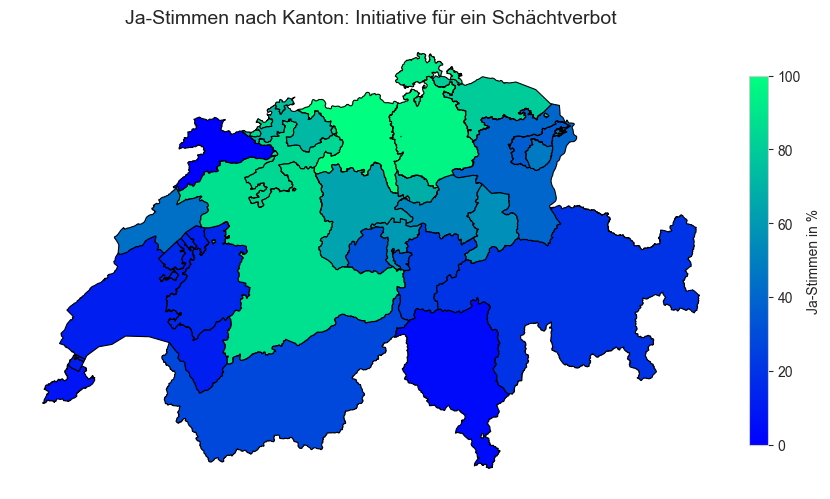

In [56]:
plot_abstimmungen_schweiz('Initiative für ein Schächtverbot')

0      False
1      False
2       True
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


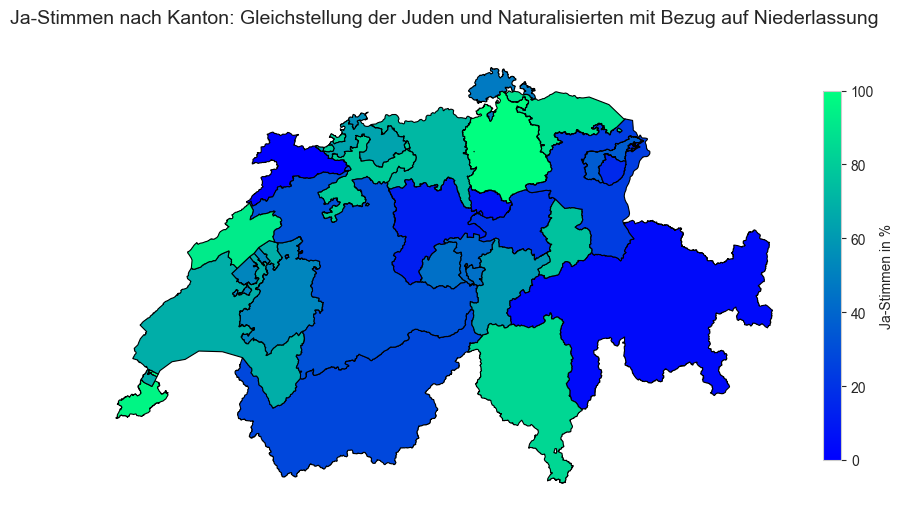

In [57]:
plot_abstimmungen_schweiz('Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung')

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


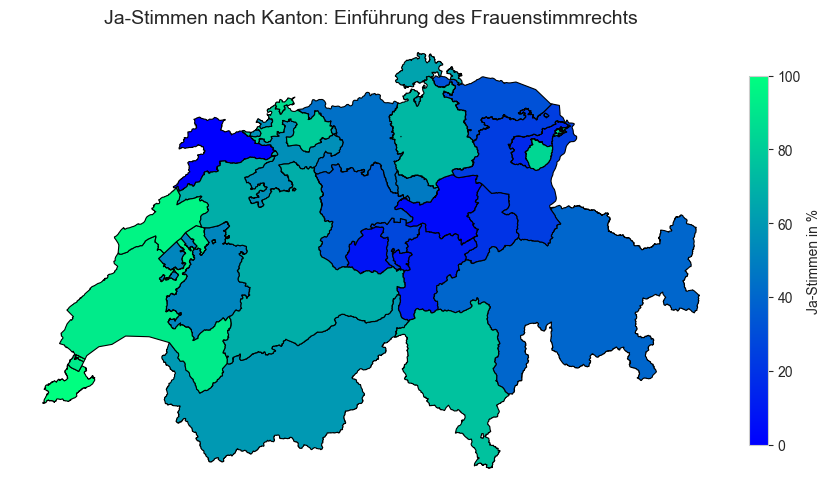

In [58]:
plot_abstimmungen_schweiz('Einführung des Frauenstimmrechts')

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


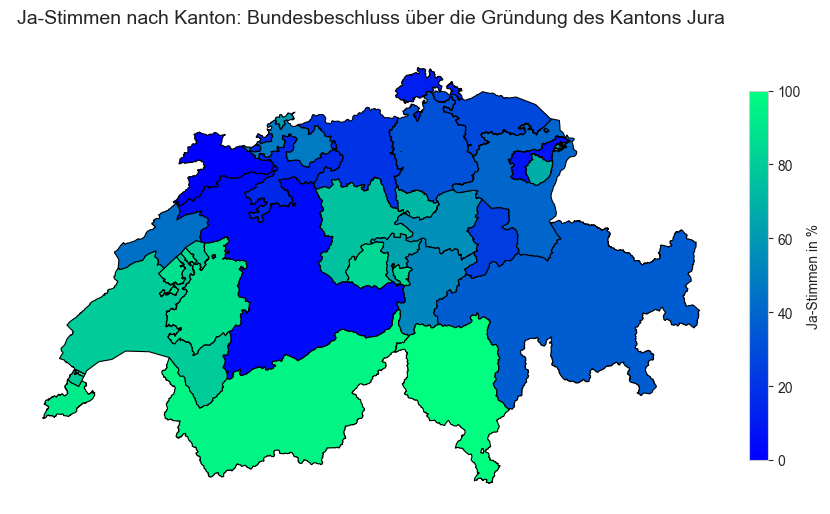

In [59]:
plot_abstimmungen_schweiz('Bundesbeschluss über die Gründung des Kantons Jura')

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_41582/3306662504.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("winter")  # oder ein benutzerdefinierter Verlauf


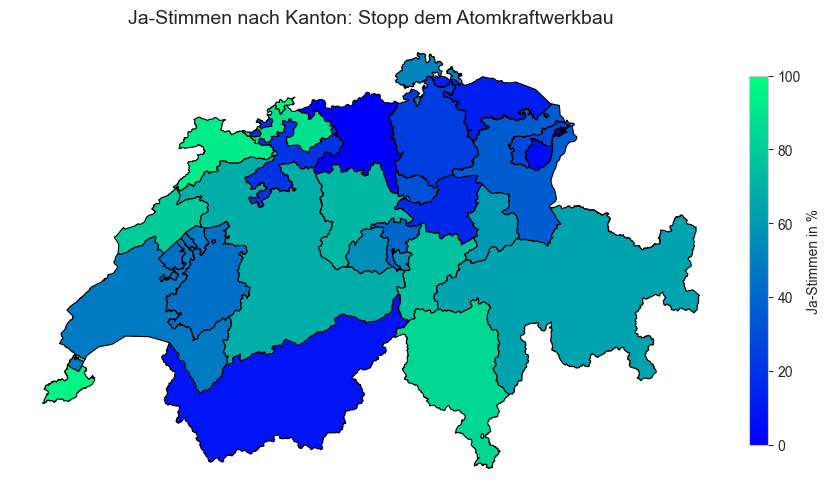

In [62]:
plot_abstimmungen_schweiz("Stopp dem Atomkraftwerkbau")